# Principal Component Analysis

# Part 1

# Introduction

Dimensionality Reduction, is one of the important techniques in Machine Learning. Feature vectors in real-world problems can have very high dimensions, up to several thousand. In addition, the number of data points is often very large. If we store and calculate directly on this high-dimensional data, it will be difficult in both storage and calculation speed. Therefore, reducing the dimensionality of data is an important step in many problems. This is also considered a data compression method.

Dimensionality Reduction, simply put, is the act of finding a function that takes an initial data point $x \in $\mathbb{D}$ with $D$ very large as input, and create a new data point $z \in \mathbb{R}^k$ has $K < D$ dimension.

This method is based on the observation that data are not usually randomly distributed in space but are usually distributed near certain special lines/surfaces. PCA considers a special case where those special surfaces are linear in form, called subspaces.

# Mathematical

### Norm 2 of a atrix

We often talk about vector norms but have not really worked much with matrix norms (besides Frobenius norm). In this section, we will get acquainted with a class of matrix norms defined based on vector norms. This class of norms is also called **Induced Norms**.

Suppose the function $\|x\|_\alpha$ is any norm of the vector $x$. For this norm, define the corresponding norm for the matrix $A$:

$$\|A\|_\alpha = \max_x \frac{\|Ax\|_\alpha}{\|x\|_\alpha}$$

Note that matrix $A$ can be a non-square matrix and the number of the columns equal to the number of dimension of $x$. Thus, computing the norm of a matrix is ​​itself an optimization problem. (the optimization function has both numerator and denominator as norms on vectors)

We will be more interested in norm 2. Norm 2 of a matrix is ​​defined as:

$$\|A\|_2 = \max_{\|x\|_2 = 1} \frac{\|Ax\|_2}{\|x\|_2}$$

If $x$ is the solution of the problem then $kx$ also a solution with $k \neq 0$ is a scalar. Assume the numerator is 1, we can rewrite it:

$$\|A\|_2 = \max_{\|x\|_2 = 1} \|Ax\|_2$$

On the way around, we must find $x$:

$$x = \argmax_x \|Ax\|_2^2 \\
\text{s.t.: }\|x\|_2^2 = 1$$

Here, the norm 2 has been squared up to avoid the square root sign. This problem can be solved using the Lagrange Multiplier Method since the constraint is an equation:

$$\mathcal{L}(x, \lambda) = \|Ax\|_2^2 + \lambda(1 - \|x\|_2^2)$$

Solution will satisfy this Lagrange is:

$$
\begin{align*}
&\frac{\partial \mathcal{L}}{\partial x} = 2A^TAx - 2\lambda x = 0 \\
&\frac{\partial \mathcal{L}}{\partial \lambda} = 1 - \|x\|_2^2 = 0
\end{align*}
$$

From derivative of $x$, we have:

$$A^TAx = \lambda x$$

This conclude $\lambda$ is a eigenvalue $A^TA$ and $X$ is 1 eigenvector with that eigenvalue. Continue to multiply both side with $x^T$:


$$x^TA^TAx = \lambda x^Tx = \lambda$$

Notice that the left side is $\|Ax\|_2^2$ is the objective function in Lagrange equation. It will reach the highest value when $\lambda$ also go the same way as it is. Otherwise, $\lambda$ is the highest eigenvalue of $A^TA$ or the largest singular value of the matrix $A$.

Thus, norm 2 of a matrix is ​​the largest singular value of that matrix. And the solution of the Lagrange is right-singular vector corresponding to that singular value.

By similar reasoning, we can deduce that the problem:

$$\min_{\|x\|_2 = 1} x^TA^TAx$$

has a solution that is the eigenvector corresponding to the smallest eigenvalue of $A^TA$. Then the function reaches its minimum value by this smallest eigenvalue.

### Expression of a vector in a different basis

In $D$-dimensional space, the coordinates of each point are determined based on a certain coordinate system. In different coordinate systems, obviously the coordinates of each point are also different.

The set of vector $e_1, \cdots, e_D$ in which each vector $e_d$ has exactly one non-zero element in the $d^\text{th}$ component and that element is equal to $1$, is called the unit basis system (or unit system) in $D$-dimensional space. If we arrange the vectors $e_d, \text{ where } d = 1, 2, \cdot, D$ in that order, we will get a $D$-dimensinal unit matrix

Each column from vector $x = [x_1, x_2, \cdot, x_D] \in \mathbf{R}^D$, representation in the unit system is:
$$x = x_1e_1 + x_2e_2 + \cdots + x_De_D$$

Suppose there is another basis system $u_1, u_2, \cdots, u_D$ (these vectors are linearly independent), then the representation of vector $x$ in this new basis system has the form:

$$x = y_1u_1 + y_2u_2 + \cdots + y_Du_D = Uy$$

$U$ is a matrix whose $d^\text{th}$ column is the vector $u_d$. Now, vector $y$ is the representation of $x$ in the new basis. The set of numbers $y_d, \text{ where } d = 1, 2, \cdots, D$ is unique because $y$ can be calculated by:
$$y = U^{-1}x$$

Note that $U$ is an invertible matrix because its columns are linearly independent.

Among the matrices that act as $U$-basis systems, the orthogonal matrices $U^TU = I$, are of more interest because their inverse is their transpose:
$$U^{-1} = U^T$$

Then $y$ also can be calculated by:
$$y = U^Tx$$

From that we have: $y_i = x^Tu_i = u_i^{T}x, i = 1, 2, \cdots, D$

The transformation of the basis system using orthogonal matrices can be thought of as a coordinate rotation. In another way, it is also a rotation of the data vector in the opposite direction.

### Trace

The trace function defined on a set of square matrices is widely used in optimization because of its nice properties. The trace function returns the sum of the diagonal elements of a square matrix.

Important properties of the trace function, assuming that the matrices in the trace function are square and matrix multiplications are possible:
- $\text{trace}(A) = \text{trace}(A^T)$
- $\text{trace}(kA) = k\text{trace}(A)$ with $k$ is constant
- $\text{trace}(AB) = \text{trace}(BA)$
- $\|A\|_F^{2} = \text{trace}(A^TA) = \text{trace}(AA^T)$ with $A$ is a matrix
- $\text{trace}(A) = \sum_{i = 1}^D \lambda_i$ with $A$ is a square matrix and $\lambda_i, i = 1, 2, \cdots, N$ is the sum of its eigenvalues, which may be complex or iterative. The proof of this property can be based on the characteristic matrix of $A$ and Viete's theorem.

## Expectation and covariance matrix

### One-dimensional Data

Given $N$ variable $x_1, x_2, \cdots, x_N$. The expectation and variance of this data set are defined as:
$$
\begin{align*}
x &= \frac{1}{N} \sum_{n = 1}^N x_n = \frac{1}{N} X1 \\
\sigma^2 &= \frac{1}{N} \sum_{n = 1}^N (x_n - \bar{x})^2
\end{align*}
$$

with $1 \in \mathbf{R}^N$ is a column vector containing all 1s. The expectation is simply the arithmetic mean of all values. The variance is the average of the squares of the distances from each point to the expectation. The smaller the variance, the closer the data points are to the expectation, i.e., the more similar the data points are. The larger the variance, the more dispersed the data are.

The square root of the variance, $\sigma$, is also called the **standard deviation** of the data.

### Multi-dimensional Data

Given $N$ data points represented by column vectors $x_1,\cdots, x_N$, then the expectation vector and covariance matrix of the entire data are defined as:

$$
\begin{align*}
\bar{x} &= \frac{1}{N} \sum_{n = 1}^N x_n \\
S &= \frac{1}{N} \sum_{n = 1}^N (x_n - \bar{x}) (x_n - \bar{x})^T = \frac{1}{N} \hat{X}\hat{X}^T \\
\end{align*}
$$

Where $\hat{X}$ is created by subtracting each column of $X$ from $\bar{x}$:
$$\hat{x}_n = x_n - \bar{x}$$

These formulas are quite similar to the formulas for 1-dimensional data above. There are a few points to note:
- The covariance matrix is a symmetric matrix, moreover, it is a positive semidefinite matrix.
- All diagonal elements of the covariance matrix are non-negative numbers. They are also the variances of each dimension of the data.
- The off-diagonal elements $s_{ij}$, $i \neq j$ represent the correlation between the $i^\text{th}$ and $j^\text{th}$ components of the data, also known as the covariance. This value can be positive, negative, or zero. When it is zero, we say that the two components i,j are uncorrelated
- If the covariance matrix is diagonal, we have data that is completely uncorrelated between dimensions.

# PCA

The simplest way to reduce the dimensionality of the data from $D$ to $K < D$ is to keep only the $K$ most important elements. However, this is certainly not the best way to do it because we do not know which elements are more important. Or in the worst case, the amount of information that each element carries is the same, removing any element will result in a large amount of information loss.

However, if we can represent the original data vectors in a new basis system in which the importance of the elements is clearly different, then we can ignore the least important elements.

Take an example of having two cameras placed to take a picture of a person, one in front of the person and one above the head. Obviously, the image captured by the camera in front of the person carries more information than the image taken from above the head. Therefore, the image taken from above the head can be ignored without losing too much information about the person's shape.

PCA is a method to find a new basis system so that the information of the data is mainly concentrated in a few coordinates, the rest only carries a small amount of information. And to simplify the calculation, PCA will find an orthonormal system to be the new basis.

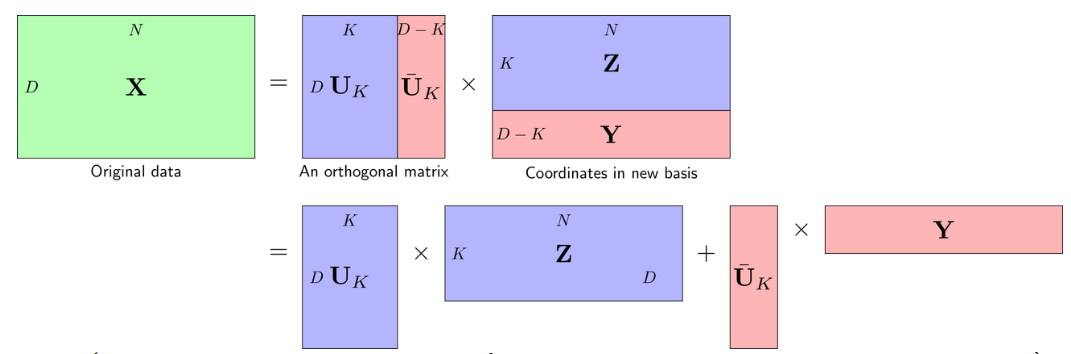

Consider the figure above with the new basis $U = [U_K,\bar{U}_K]$ which is an orthonormal system with $U_K$ being the submatrix formed by the first $K$ columns of $U$. With this new basis, the data matrix can be written as:

$$X = U_K Z + \bar{U}_K Y ~~~ (1)$$

From here we infer:

$$
\begin{bmatrix} Z \\ Y \end{bmatrix} = \begin{bmatrix} U_K^{T} \\ \bar{U}_K^{T} \end{bmatrix} \Rightarrow \begin{matrix}
\mathbf{Z} = \mathbf{U}_K^T \mathbf{X} \newline
\mathbf{Y} = \bar{\mathbf{U}}_K^T\mathbf{X}
\end{matrix} ~~~ (2)
$$

The goal of PCA is to find an orthogonal matrix $U$ such that most of the information is retained in the blue part $U_KZ$ and the red part $\bar{U}_KY$ is removed and replaced by a matrix that does not depend on each data point. In other words, we will approximate $Y$ by a matrix whose columns are all the same. Note that *these columns may depend on the training data but not on the test data*, which you will see more clearly when programming which I will present in the next section. Let each of these columns be $b$ and we can consider it as a bias, then we will approximate:

$$Y \approx b1^T$$

Where $1^T \in \mathbf{R}^{1 \times N}$ is a row vector whose elements are all equal to $1$. Assuming we have found $U$, we need to find $b$ such that:

$$\mathbf{b} = \text{argmin}_{\mathbf{b}} ||\mathbf{Y} - \mathbf{b1}^T||_F^2 = \text{argmin}_{\mathbf{b}} ||\bar{\mathbf{U}}_K^T\mathbf{X} - \mathbf{b1}^T||_F^2$$

Solve the derivative equation with respect to $b$ of the objective function equal to $0$:

$$(\mathbf{b1}^T - \bar{\mathbf{U}}_K^T\mathbf{X})\mathbf{1} = 0 \Rightarrow N\mathbf{b} = \bar{\mathbf{U}}_K^T \mathbf{X1} \Rightarrow \mathbf{b} = \bar{\mathbf{U}}_K^T \bar{\mathbf{x}}$$

Thus, the computation will be much more convenient if the expected vector $\bar{x} = 0$. This can be achieved if, at the beginning, we subtract from each data vector the expected vector of the entire data. This is the first step of PCA.

With this found value of $b$, the original data will be approximated by:

$$\mathbf{X} \approx \tilde{\mathbf{X}} = \mathbf{U}_K \mathbf{Z} + \bar{\mathbf{U}}_K \bar{\mathbf{U}}_K^T\bar{\mathbf{x}}\mathbf{1}^T ~~~ (3)$$

Combining (1), (2), (3) we define the main loss function as follows:

$$ J = \frac{1}{N} || \mathbf{X} - \tilde{\mathbf{X}}||_F^2 = \frac{1}{N} ||\bar{\mathbf{U}}_K \bar{\mathbf{U}}_K^T \mathbf{X} -  \bar{\mathbf{U}}_K \bar{\mathbf{U}}_K^T \bar{\mathbf{x}}\mathbf{1}^T||_F^2 ~~~(4) $$

Note that if the columns of a matrix $V$ form an orthonormal system, then for any matrix $W$, we always have:

$$ ||\mathbf{VW}||_F^2 = \text{trace} (\mathbf{W}^T\mathbf{V}^T\mathbf{V} \mathbf{W}) = \text{trace}(\mathbf{W}^T\mathbf{W}) = ||\mathbf{W}||_F^2 $$

So the loss function in (4) can be rewritten as:

$$
\begin{align*}
J &= \frac{1}{N} || \bar{\mathbf{U}}_K^T (\mathbf{X} -   \bar{\mathbf{x}}\mathbf{1})^T||_F^2 = \frac{1}{N} ||\bar{\mathbf{U}}_K^T\hat{\mathbf{X}} ||_F^2& \newline
&= \frac{1}{N} ||\hat{\mathbf{X}}^T \bar{\mathbf{U}}_K ||_F^2 =
\frac{1}{N}\sum_{i = K+1}^D ||\hat{\mathbf{X}}^T\mathbf{u}_i ||_2^2& \newline
&= \frac{1}{N} \sum_{i=K+1}^D \mathbf{u}_i^T\hat{\mathbf{X}}\hat{\mathbf{X}}^T \mathbf{u}_i& \newline
&= \sum_{i=K+1}^D \mathbf{u}_i^T\mathbf{S} \mathbf{u}_i ~~~(5)
\end{align*}
$$

Where $\bar{X} = X − \bar{x} 1T$ is the normalized data and $S$ is the covariance matrix of the data. We call this matrix $\hat{X}$ zero-corrected data or normalized data. It can be seen that $\hat{x}_n = x_n − \bar{x}$

The remaining task is to find the $u_i$ for which the loss is minimized. First, we have an interesting observation. Recall the definition of the covariance matrix $S = \frac{1}{N} \hat{X}^T \hat{X}$. For any orthogonal $U$ matrix, substituting $K = 0$ into (5) we have:

$$
\begin{align*}
L &= \sum_{i=1}^D \mathbf{u}_i^T\mathbf{Su}_i = \frac{1}{N} ||\hat{\mathbf{X}}^T\mathbf{U}||_F^2 \newline
&= \frac{1}{N} \text{trace}(\hat{\mathbf{X}}^T\mathbf{U} \mathbf{U}^T \hat{\mathbf{X}}) \newline
&= \frac{1}{N} \text{trace} (\hat{\mathbf{X}}^T \hat{\mathbf{X}}) ~~~ (6) \newline
&= \frac{1}{N} \text{trace} (\hat{\mathbf{X}} \hat{\mathbf{X}}^T) \newline
&= \text{trace} (\mathbf{S}) = \sum_{i=1}^D \lambda_i
\end{align*}
$$

With $\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_D \geq 0$ are the eigenvalues of the positive semidefinite matrix $S$. Note that these eigenvalues are real and non-negative.

Thus $L$ does not depend on the choice of the orthogonal matrix $U$ and is equal to the sum of the diagonal elements of $S$. In other words, $L$ is the sum of the variances of each component of the original data.

Therefore, minimizing the loss function J given by (6) is equivalent to maximizing:

$$F  = L - J = \sum_{i=1}^K \mathbf{u}_i \mathbf{S} \mathbf{u}_i^T$$

**Theorem 1**: $F$ has a maximum value of $\sum_{i = 1}^K = \lambda_i$ when $u_i$ are eigenvectors with norm 2 equal to 1 corresponding to these eigenvalues. Of course, we do not forget the orthogonality condition between the $u_i$.

Note that $\lambda_i, i = 1, \cdots, K$ are the $K$ largest eigenvalues of the covariance matrix $S$. The largest eigenvalue $\lambda_1$ of this matrix is also called the ***First Principal Component***, the second eigenvalue $\lambda_2$ is also called the ***Second Principal Component***, etc. Therefore, this method is called Principal Component Analysis. We only keep $K$ principal components of the data when we want to reduce the number of data dimensions.

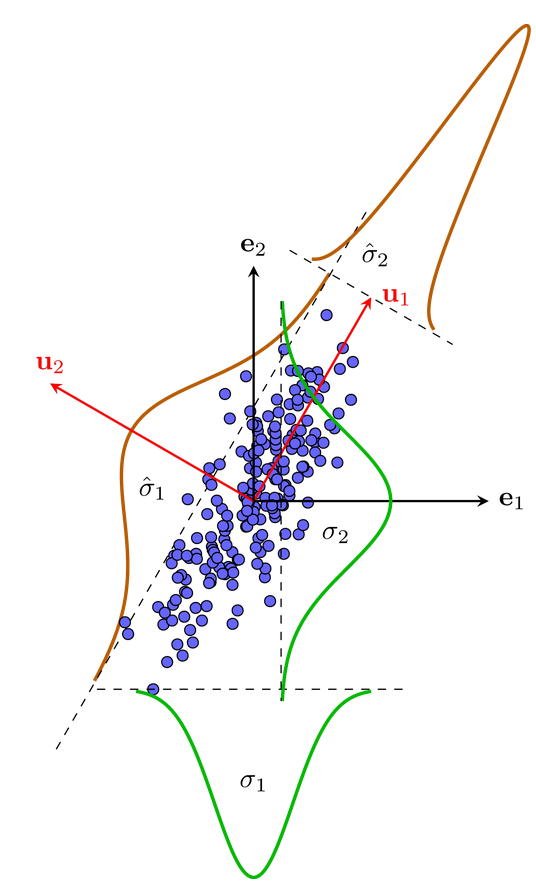

In the original space with black basis vectors $e_1$,$e_2$, the variance in each data dimension is large. In the new space with red basis vectors $u_1$, $u_2$, the variance in the second dimension $\hat{\sigma}_2$ is very small compared to $\hat{\sigma}_1$. This means that when projecting the data onto $u_2$, we get points that are very close to each other and close to the expectation in that dimension. In this case, the expectation in all dimensions is zero, so we can replace the coordinates in the $u_2$ dimension with zero. Obviously, the smaller the variance in the data in a certain dimension, the smaller the error when approximating that dimension with a constant. PCA is essentially finding a rotation corresponding to an orthogonal matrix such that in the new coordinate system, there exist dimensions with small variance that we can ignore; we only need to keep the other dimensions/components that are more important. As demonstrated above, the total variance in all dimensions in any basis system is the same and equal to the sum of the eigenvalues of the covariance matrix. Therefore, PCA is also considered as a method to reduce the number of data dimensions while keeping the remaining total variance as large as possible.

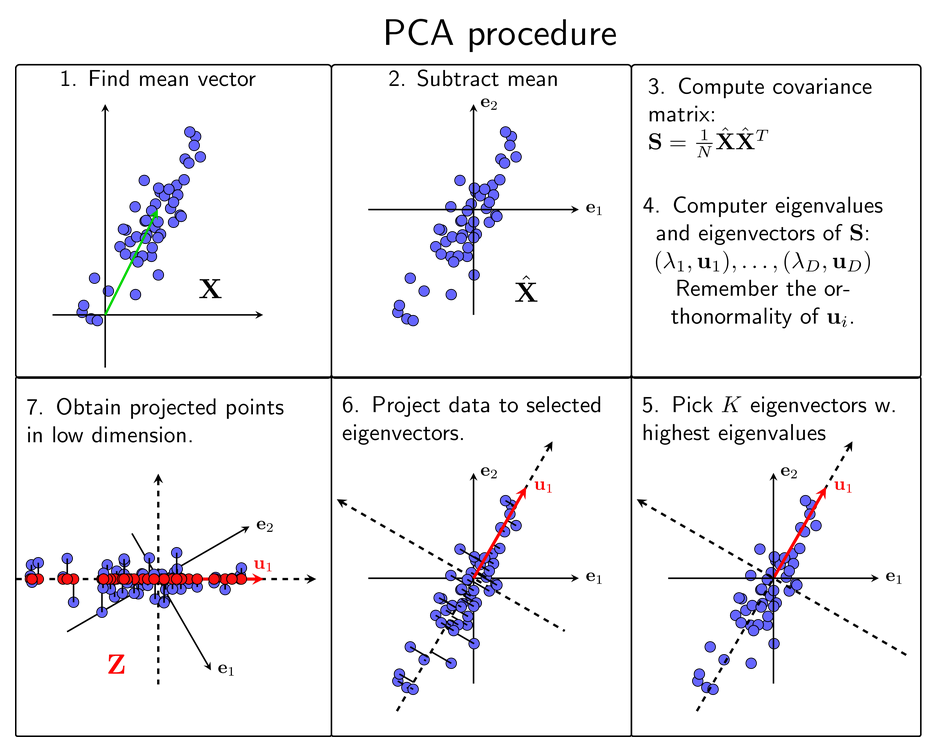

# Part 2

Note: Please read SVD in 11 first before move to this one

# Relationship between PCA and SVD

### SVD for approx low-rank problem

Solution $A$ of the problem of approximating a matrix by another matrix of rank not exceeding $k$:

$$\min_{\mathbf{A}} ||\mathbf{X} - \mathbf{A}||_F ~~~~~~~~~~~~~~ (1)\newline
\text{s.t.} \text{rank}(\mathbf{A}) = K$$

is the Truncated SVD of $A$. Specifically, if the SVD of $X \in \mathbf{R}^{D \times N}$ is

$$X = U\Sigma V^T$$

Where $\mathbf{U} \in \mathbb{R}^{D \times K}$ and $\mathbf{V}\in \mathbb{R}^{N\times K}$ are the matrices formed by the first $k$ columns of $U$ and $V$, and $\Sigma_K \in \mathbf{R}^{K \times K}$ is the subdiagonal matrix corresponding to the first $K$ rows and first $K$ columns of $\Sigma$

### The idea of PCA

PCA is the problem of finding the orthogonal matrix $U$ and the matrix describing the data in the low-dimensional space $Z$ such that the following approximation is best:

$$\mathbf{X} \approx \tilde{\mathbf{X}} = \mathbf{U}_K \mathbf{Z} + \bar{\mathbf{U}}_K \bar{\mathbf{U}}_K^T\bar{\mathbf{x}}\mathbf{1}^T ~~~ (3)$$

Where $U_K$, $\bar{U}_K$ are the matrices formed by the first $K$ columns and the last $D − K$ columns of the orthogonal matrix $U$, respectively, and $\bar{x}$ is the expectation vector of the data.


Assume that the $\bar{x} = 0$. Then $(3)$:

$$\mathbf{X} \approx \tilde{\mathbf{X}} = \mathbf{U}_K \mathbf{Z}~~~ (4)$$

The PCA optimization problem will become:

$$
\begin{aligned}
\mathbf{U}_K, \mathbf{Z} &=& \min_{\mathbf{U}_K, \mathbf{Z} } ||\mathbf{X} - \mathbf{U}_K \mathbf{Z}||_F& ~~~ (5)\newline
\text{s.t.:}&& \mathbf{U}_K^T \mathbf{U}_K = \mathbf{I}_K &
\end{aligned}
$$

Where $I_K \in \mathbf{R}^{K \times K}$ is the identity matrix in $K$-dimension, and the constraint is to ensure that the $U_K$ columns form an orthonormal system.

### PCA and SVD

Do you see the similarity between the two optimization problems $(1)$ and $(5)$ and the solution to the first problem given in $(2)$? You can immediately see that the solution to problem $(5)$ is:

$$
\begin{aligned}
\mathbf{U}_K \quad \text{in}\quad (5) &=& \mathbf{U}_K\quad \text{in} \quad(2) \newline
\mathbf{Z} \quad\text{in}\quad (5) &=& \mathbf{\Sigma}_K \mathbf{V}_K^T \quad \text{in} \quad (2)
\end{aligned}
$$

Thus, if the data points are represented by the columns of a matrix, and the mean of each row of the matrix is ​​zero (so that the expectation vector is zero), then the solution to the PCA problem is derived directly from the Truncated SVD of the matrix. In other words, the solution to PCA is a special case of the Matrix Factorization problem solved by SVD.

# How to choose the direction of new data

The question is, how to choose the value of $K$ - the dimension of the new data - for each different type of data?

One way to determine $K$ is based on the amount of information you want to retain. As mentioned, PCA is also known as the maximum sum of retained variance method. So we can consider the sum of the retained variances as the amount of information retained. The larger the variance, the more dispersed the data is, and the greater the amount of information it represents.

Recall that in every coordinate system, the total variance of the data is the same and equals the sum of the eigenvalues ​​of the covariance matrix $\sum_{i = 1}^{\mathbf{D}} \lambda_i$. Furthermore, PCA helps to retain the amount of information (the sum of the variances) that is $\sum_{i=1}^K \lambda_i$. So we can consider the expression:

$$r_K = \frac{\sum_{i=1}^K \lambda_i}{\sum_{j=1}^D \lambda_j} \quad \quad (6)$$

is the amount of information retained when the number of new data dimensions after PCA is $K$.

Thus, assuming we want to retain $99\%$ of the data, we just need to choose $K$
as the smallest natural number such that $r_K \geq 0.99$.

When the data is distributed around a subspace, the largest variance values ​​corresponding to the first $\lambda_i$ are much larger than the remaining variances. Then, we can choose K quite small to achieve $r_K \geq 0.99$


# Notes on calculating PCA in practical problems

There are two practical cases that we need to pay attention to when using PCA. The first case is when the amount of data obtained is much smaller than the number of data dimensions. The second case is when the amount of data in the training set is very large, up to millions. Calculating the covariance matrix and eigenvalues ​​sometimes becomes impossible. There are effective solutions for these cases.

**In this section, we will assume that the data has been normalized, that is, the expectation vector has been subtracted. Then, the covariance matrix will be $\mathbf{S} = \frac{1}{N}\mathbf{X}\mathbf{X}^T$**


### The number of data dimensions is more than the number of data points.

That is the case $D > N$, that is, the data matrix $$X$ is a ‘tall matrix’. Then, the number of non-zero eigenvalues ​​of the covariance matrix $S$ will not exceed its rank, that is, not exceed $N$. So we need to choose $K \leq N$ because it is impossible to choose $K > N$ non-zero eigenvalues ​​of a matrix with rank $N$.

The calculation of eigenvalues ​​and eigenvectors can also be done efficiently based on the following properties:
- Property 1: The eigenvalues ​​of $A$ are also the eigenvalues ​​of $k_A$ for any $k \neq 0$. This can be directly deduced from the definition of eigenvalues ​​and eigenvectors.
- Property 2: The eigenvalues ​​of $AB$ are also the eigenvalues ​​of $BA$ for $A \in \mathbf{R}^{d_1 × d_2}$, $B \in \mathbf{R}^{d_2 \times d_1}$ are any matrices and $d_1$, $d_2$ are any non-zero natural numbers. Thus, instead of finding the eigenvalues ​​of the covariance matrix $S \in \mathbf{R}^{D \times D}$, we look for the eigenvalues ​​of the matrix $T = X^TX \in \mathbf{R}^{N \times N}$ with a smaller dimension (because $N < D$).
- Property 3: Suppose $(\lambda, u)$ is a pair of eigenvalues ​​- eigenvectors of $T$, then $(\lambda, Xu)$ is a pair of eigenvalues ​​- eigenvectors of $S$. So:
$$
\begin{aligned}
  \mathbf{X}^T \mathbf{Xu} &=& \lambda \mathbf{u}& \quad (7) \newline
  \Rightarrow (\mathbf{X}\mathbf{X}^T)(\mathbf{Xu}) &=& \lambda \mathbf{Xu} & \quad (8)
\end{aligned}
$$

Equation $(7)$ is by definition of eigenvalues ​​and eigenvectors. Equation $(8)$ is obtained from $(7)$ by multiplying the left side of both sides by the matrix $X$. From $(8)$ we deduce **Observation 3**.

Thus, we can completely calculate the eigenvalues ​​and eigenvectors of the covariance matrix based on a smaller matrix.

### Normalize the eigenvectors

Recall the definition of eigenspace: The eigenspace corresponding to an eigenvalue of a matrix is ​​the span subspace created by all the eigenvectors corresponding to that eigenvalue.

The last thing to do is to normalize the eigenvectors so that they form an orthonormal system. This can be based on the following two points:

**First**, if $A$ is a symmetric matrix, $(\lambda_1, x_1)$, $(\lambda_2, x_2)$ are pairs of eigenvalues ​​- eigenvectors of $A$ with $\lambda_1 \neq \lambda_2$, then $x_1^T x_2 = 0$. In other words, any two vectors in two different eigenspaces of a symmetric matrix are orthogonal to each other. The proof of this property can be seen in the following line:

$$\mathbf{x}_2^T \mathbf{Ax}_1 = \mathbf{x}_1^T \mathbf{Ax}_2 = \lambda_1 \mathbf{x}_2^T \mathbf{x}_1 = \lambda_2 \mathbf{x}_1^T \mathbf{x}_2 \Rightarrow \mathbf{x}_1^T \mathbf{x}_2 = 0$$

The final equality occurs because $\lambda_1 \neq \lambda_2$.

**Second**, with the independent eigenvalues ​​found in an eigenspace, we can use the Gram-Schmit process to normalize them to a normal system.

Combining the above two points, we can obtain the eigenvectors that form a normal system, which is the $U_K$ matrix in PCA.

### Large-scale problems

In many problems, both $D$ and $N$ are very large numbers, which means that we have to find the eigenvalues ​​for a very large matrix. For example, there are 1 million $1000 \times 1000$ pixel images, so $D = N = 10^6$, is a very large number, directly calculating the eigenvalues ​​and eigenvectors for the covariance matrix is ​​not feasible. However, there is a method that allows us to calculate these values ​​more quickly. That method is called the **Power Method**.

This method states that if we perform the following procedure, we will find the first pair of eigenvalues ​​and eigenvectors of a positive semidefinite matrix:
1. Pick a any vector $q^{(0)} \in \mathbf{R}^n$, $||q^{(0)}||_2 = 1$
2. With $k = 1, 2, \dots$, find: $z = Aq^{(k - 1)}$
3. Normalize $q^{(k)} = \frac{z}{||z||_2}$
4. If $||q^{(k)} - q^{(k - 1)}||_2$ small enough then stop, else: $k = k + 1$ then back to step 2
5. $q^{(k)}$ is the eigenvector corresponding to the largest eigenvalue $\lambda_1 = (q^{(k)})^T Aq^{(k)}$

This process converges quite quickly and has been proven.

To find the second eigenvector and eigenvalue of matrix $A$, we rely on the following theorem:

Theorem: If a positive semidefinite matrix $A$ has eigenvalues $​​\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_n (\geq 0)$ and corresponding eigenvectors $v_1,\dots , v_n$, and these eigenvectors form an orthonormal system, then the matrix:

$$ \mathbf{B} = \mathbf{A} - \lambda_1 \mathbf{v}_1 \mathbf{v}_1^T $$

Proven:


With $i = 1$:
$$
\mathbf{Bv}_1 = (\mathbf{A} - \lambda_1 \mathbf{v}_1 \mathbf{v}_1^T) \mathbf{v} = \mathbf{Av}_1 - \lambda_1 \mathbf{v}_1 = \mathbf{0} \newline$$


With $i > 1$:

$$
\begin{aligned}
  \mathbf{Bv}_i &=& (\mathbf{A} - \lambda_1 \mathbf{v}_1 \mathbf{v}_1^T)\mathbf{v}_i \newline
  &=& \mathbf{Av}_i - \lambda_1 \mathbf{v}_1 (\mathbf{v}_1^T \mathbf{v}_i) \newline
  &=& \mathbf{Av}_i = \lambda_i \mathbf{v}_i
\end{aligned}
$$

Now, $(\lambda_2, v_2)$ becomes the largest eigenvalue-eigenvector pair of $B$. The way to find these two variables is again done by the Power Method.

Continuing this process, we will find (approximately) all the eigenvalues ​​and corresponding eigenvectors of the covariance matrix. Also note that we only need to find the $K$th eigenvalue of the covariance matrix. This method is widely used in practice.

The Power Method is also the basic algorithm in Google PageRank, which helps to arrange websites in decreasing order of popularity. PageRank is the foundation of Google; today, searching in Google uses more advanced algorithms than PageRank.

# Unsupervised Abnormal Detection

In addition to compression and classification applications, PCA is used in many other areas. Abnormal Detection is one of them. Furthermore, suppose we do not know the labels of these events, that is, we are dealing with an unsupervised problem.

The basic idea is that ‘normal’ events are usually close to a certain subspace, while ‘abnormal’ events are usually different from ‘normal’ events, that is, far from that subspace. Furthermore, because they are ‘abnormal’, the number of events of this type is very small compared to ‘normal’.

Thus, we can perform PCA on the entire data to find the principal components of the data, from which we can infer the subspace that the ‘normal’ points are close to. Determining whether a point is ‘normal’ or ‘abnormal’ is determined by measuring the distance from that point to the found subspace.